## Baysian Excess Variance (Bexvar)

The Bayesian Excess Variance (bexvar) is a statistical measurement of variability in Poisson-distributed light curves. Bexvar is a Bayesian formulation of excess variance. A brief summary of theoretical understanding of bexvar is given at the end of this tutorial.  

The `bexvar()` method implemented in Stingray, provides posterior samples of bexvar given a light curve data as input parameters.  
This tutorial is intended to give a demonstration of How to use `bexvar()` method implemented in Stingray.
The method takes following input parameters. (Given here for completeness)


&emsp;&emsp;```time``` : iterable, `:class:numpy.array` or `:class:List` of floats, optional, default ``None``  
&emsp;&emsp;&emsp;&emsp; A list or array of time stamps for a light curve.  
&emsp;&emsp;`time_del` : iterable, `:class:numpy.array` or `:class:List` of floats  
&emsp;&emsp;&emsp;&emsp;A list or array of time intervals for each bin of light curve.  
&emsp;&emsp;`src_counts` : iterable, `:class:numpy.array` or `:class:List` of floats  
&emsp;&emsp;&emsp;&emsp;A list or array of counts observed from source region in each bin.  
&emsp;&emsp;`bg_counts` : iterable, `:class:numpy.array` or `:class:List` of floats, optional, default ``None``  
&emsp;&emsp;&emsp;&emsp;A list or array of counts observed from background region in each bin. If ``None``  
&emsp;&emsp;&emsp;&emsp;we assume it as a numpy array of zeros, of length equal to length of ``src_counts``.  
&emsp;&emsp;`bg_ratio` : iterable, `:class:numpy.array` or `:class:List` of floats, optional, default ``None``  
&emsp;&emsp;&emsp;&emsp;A list or array of source region area to background region area ratio in each bin.  
&emsp;&emsp;&emsp;&emsp;If ``None`` we assume it as a numpy array of ones, of length equal to the length of  
&emsp;&emsp;&emsp;&emsp;``src_counts``.  
&emsp;&emsp;`frac_exp` : iterable, `:class:numpy.array` or `:class:List` of floats, optional, default ``None``  
&emsp;&emsp;&emsp;&emsp;A list or array of fractional exposers in each bin. If ``None`` we assume it as  
&emsp;&emsp;&emsp;&emsp;a numpy array of ones, of length equal to length of ``src_counts``.  


Let us start by importing the bexvar module

In [13]:
from stingray import bexvar

Now consider an example dataset.

In [14]:
import numpy as np

time = np.arange(0,8)*100
counts= np.array([106, 87, 115, 148, 43, 129, 204, 87])
time_del = np.ones(np.size(time))*100
bg_counts = np.array([722, 696, 701, 721, 722, 703, 722, 695])
bg_ratio = np.array([0.01474, 0.01158, 0.01214, 0.01308, 0.010877, 0.01177, 0.01058, 0.01138])
frac_exp = np.array([0.37416, 0.21713, 0.37937,  0.50140, 0.11617, 0.39221, 0.64275, 0.31160])

Call bexvar function to get posterior distribution of bexvar.

The `bexvar()` method uses [UltraNest](https://johannesbuchner.github.io/UltraNest/) python package to obtain the posteriors of bexvar. Ultranest gives a brief summary of log evidence (log(z)) and its uncertainties, and the parameter constraints.  


In [16]:

 bexvar_distribution = bexvar.bexvar(time=time, src_counts=counts, time_del=time_del, frac_exp=frac_exp,
                                     bg_counts=bg_counts, bg_ratio=bg_ratio)

preparing time bin posteriors...
running bexvar...
[ultranest] Sampling 400 live points from prior ...
[ultranest] Explored until L=-2e+01   [-20.4040..-20.4040]*| it/evals=3622/5046 eff=77.9595% N=400 
[ultranest] Likelihood function evaluations: 5051
[ultranest]   logZ = -24.86 +- 0.0784
[ultranest] Effective samples strategy satisfied (ESS = 1590.2, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.47+-0.06 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.08, need <0.5)
[ultranest]   logZ error budget: single: 0.09 bs:0.08 tail:0.01 total:0.08 required:<0.50
[ultranest] done iterating.

logZ = -24.856 +- 0.156
  single instance: logZ = -24.856 +- 0.093
  bootstrapped   : logZ = -24.856 +- 0.156
  tail           : logZ = +- 0.010
insert order U test : converged: True correlation: inf iterations

    logmean             : 0.350 │ ▁ ▁ ▁▁▁▁▁▁▁▁▂▃▄▅▆▇▇▇▆▅▄▃▂▁▁▁▁▁▁▁ ▁ ▁▁ │0.575     0.461 +- 0.020
    logsigma            : 0.010 │

We can then plot the samples to visualize the posterior distribution of bexvar.

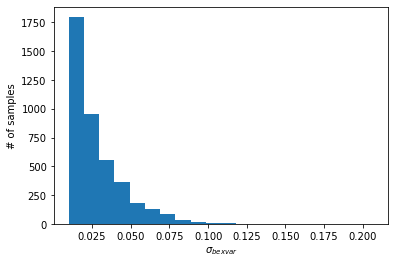

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(bexvar_distribution, bins=20)
plt.ylabel("# of samples")
plt.xlabel(r"$\sigma_{bexvar}$")
plt.show()

If the light curve is intrinsically variable, then the posterior distribution of bexvar should exclude low values. Users can compute 
the lower 10% quantile of the posterior, and use it as a variability indicator (see [Buchner et al. (2021)](https://arxiv.org/abs/2106.14529)).

The method uses fractional exposers (`frac_exp`) in each bin to compute the count rates (i.e.$~\scriptstyle{R_i = C_i/(\Delta{t_i}\times f_i)}$). In its current form it only considers time bins with `frac_exp` < 1. The `bg_ratio` parameter is used to scale the `bg_counts` to estimate counts in source region. The `bg_count`, `bg_ratio` and `frac_exp` are optional parameters, if they are not provided, the method defines default values for them as described in documentation. 

Let us see an example to get bexvar distribution without these optional parameters.

In [3]:
import numpy as np

time = np.arange(0,8)*100
counts= np.array([106, 87, 115, 148, 43, 129, 204, 87])
time_del = np.ones(np.size(time))*100

bexvar_distribution = bexvar.bexvar(time=time, src_counts=counts, time_del=time_del)

preparing time bin posteriors...
running bexvar...
[ultranest] Sampling 400 live points from prior ...
[ultranest] Explored until L=-4e+01   [-36.8486..-36.8486]*| it/evals=3615/5101 eff=76.8985% N=400 
[ultranest] Likelihood function evaluations: 5125
[ultranest]   logZ = -41.34 +- 0.09729
[ultranest] Effective samples strategy satisfied (ESS = 1692.4, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.46+-0.06 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.10, need <0.5)
[ultranest]   logZ error budget: single: 0.09 bs:0.10 tail:0.01 total:0.10 required:<0.50
[ultranest] done iterating.

logZ = -41.331 +- 0.174
  single instance: logZ = -41.331 +- 0.092
  bootstrapped   : logZ = -41.335 +- 0.174
  tail           : logZ = +- 0.010
insert order U test : converged: True correlation: inf iterations

    logmean             : -0.517│ ▁  ▁  ▁▁▁▁▁▁▁▁▁▁▂▂▃▄▆▇▇▆▅▄▃▂▁▁▁▁▁▁▁▁▁ │0.383     0.020 +- 0.081
    logsigma            : 0.029 

### Bexvar: Theoretical background


This section provides a theoretical understanding of Bayesian excess variance (bexvar). This is an optional read.

Given a lightcurve data ${\scriptstyle 𝐷 = (𝑆_1,𝐵_1,~…~,𝑆_𝑁,𝐵_𝑁)}$
 where ($\scriptstyle{S_i}$) denotes counts obtained from source region and ($\scriptstyle{B_i}$) denotes counts obtained from background extraction region in $\scriptstyle{i^{th}}$ time bin.
If it is assumed that the counts $\scriptstyle{𝑆_𝑖}$ and $\scriptstyle{𝐵_𝑖}$ can be expressed as
Poisson processes. 
$$ \scriptstyle {𝑆_𝑖 ~ \sim ~ 𝑃𝑜𝑖𝑠𝑠𝑜𝑛((( 𝑅_𝑆(𝑡_𝑖) ~+~ 𝑅_𝐵(𝑡_𝑖) \times 𝑟)~×~𝑓_𝑖~\times~Δ𝑡)}$$
$$ \scriptstyle  {𝐵_𝑖 ~ \sim ~ 𝑃𝑜𝑖𝑠𝑠𝑜𝑛(𝑅_𝐵(𝑡_𝑖) × 𝑓_𝑖 × Δ𝑡)}$$

Here, $\scriptstyle{𝑅_𝑆(𝑡_𝑖)}$ is source count rate and $\scriptstyle{𝑅_B(𝑡_𝑖)}$ is background count rate in $\scriptstyle{i^{th}}$ time bin.  
It is further assumed that $\scriptstyle{𝑅_𝑆(𝑡_𝑖)}$ is distributed according to a log normal distribution, with some unknown parameters (i.e., $\scriptstyle{log(\bar{𝑅_{S}})}$, and $\scriptstyle{\sigma_{bexvar}}$).
$$\scriptstyle{log(𝑅_𝑆(𝑡_𝑖))~\sim~𝑁𝑜𝑟𝑚𝑎𝑙(log(\bar{𝑅_𝑆}),~ \sigma_{𝑏𝑒𝑥𝑣𝑎𝑟})} $$

This $\sigma_{𝑏𝑒𝑥𝑣𝑎𝑟}$ provides intrinsic variability on log-count rate and it is defined as Bayesian excess variance (bexvar). The posterior distribution of $\sigma_{𝑏𝑒𝑥𝑣𝑎𝑟}$ can be used to identify intrinsically variable object.

The bexvar() method in Stingray returns posterior samples of $\scriptstyle{\sigma_{𝑏𝑒𝑥𝑣𝑎𝑟}}$ given a light curve data.
The samples are generated following the same prescription given in [Buchner et al. (2021)](https://arxiv.org/abs/2106.14529). The method uses flat, uninformative priors on $\scriptstyle{log(\bar{𝑅_𝑆})}$ and $\scriptstyle{log(\sigma_{𝑏𝑒𝑥𝑣𝑎𝑟})}$ and obtains the posterior samples using nested sampling Monte Carlo algorithm MLFriends (Buchner [2016](https://link.springer.com/article/10.1007/s11222-014-9512-y),
[2019](https://arxiv.org/abs/1707.04476)) implemented in the [UltraNest](https://johannesbuchner.github.io/UltraNest/) Python package (Buchner [2021](https://arxiv.org/abs/2101.09604)).

